<a href="https://colab.research.google.com/github/mubashir1osmani/medical-image-preprocessing/blob/main/object_detection_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib pandas opencv-python tk pydicom opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.3 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: warningoutofmind
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [ ]:
!ls brain-mri-images-for-brain-tumor-detection/

brain_tumor_dataset  no  yes


Image loaded successfully. Shape: (212, 209)


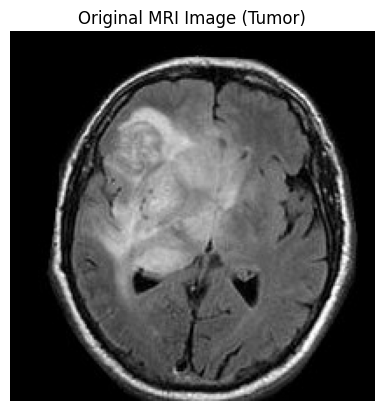

In [ ]:
import cv2
import matplotlib.pyplot as plt

# load a certain image
image_path = 'brain-mri-images-for-brain-tumor-detection/yes/Y2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not load image. Check the file path.")
else:
    print("Image loaded successfully. Shape:", image.shape)

plt.imshow(image, cmap='gray')
plt.title("Original MRI Image (Tumor)")
plt.axis('off')
plt.show()

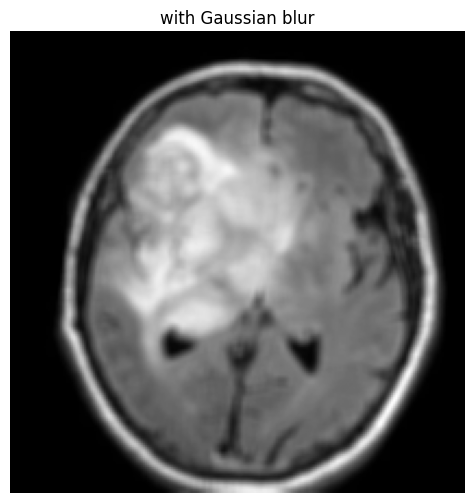

In [ ]:
# preprocess: apply gaussian blur and display images side by side

blurred_image = cv2.GaussianBlur(image, (5,5), cv2.BORDER_DEFAULT) # 0 is standard deviation
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original MRI Image")
plt.axis("off")

# blurred
plt.subplot(1,2,1)
plt.imshow(blurred_image, cmap="gray")
plt.title("with Gaussian blur")
plt.axis("off")

plt.tight_layout()
plt.show()

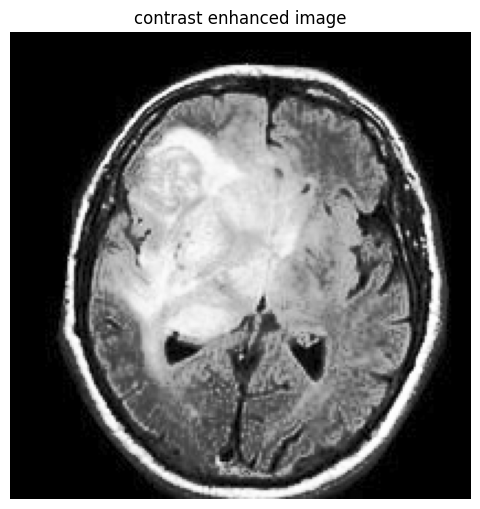

In [ ]:
# apply contrast enhancement
enhanced_image = cv2.equalizeHist(image)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(enhanced_image, cmap="gray")
plt.axis("off")
plt.title("contrast enhanced image")
plt.tight_layout()
plt.show()

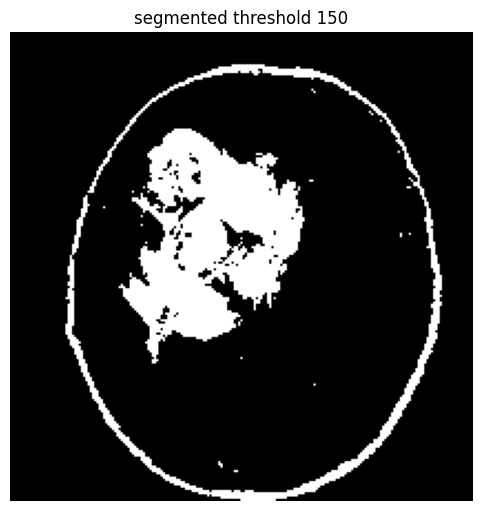

min intensity: 0 max intensity:  255


In [ ]:
#thresholding and segmentation
# this differentiates the healthy tissue from the tumor tissue

_, segmented_image = cv2.threshold(enhanced_image, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(segmented_image, cmap="gray")
plt.title("segmented threshold 150")
plt.axis("off")
plt.tight_layout()
plt.show()

print("min intensity:", enhanced_image.min(), "max intensity: ", enhanced_image.max())

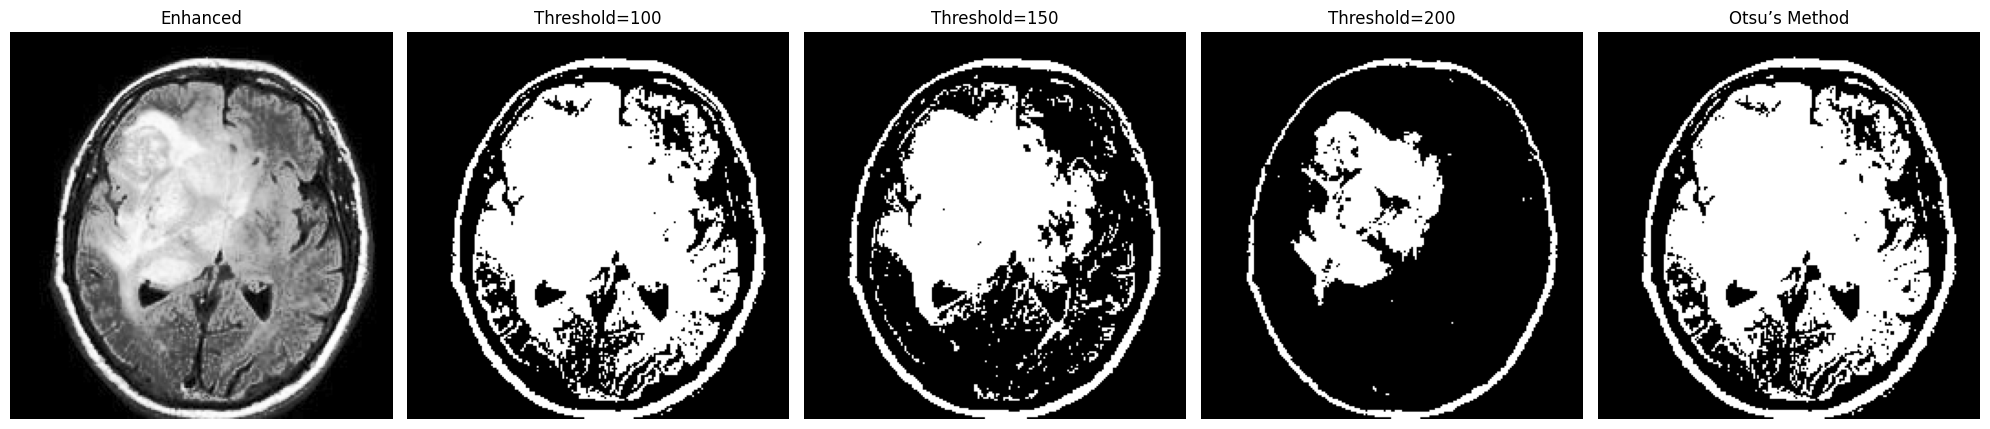

Enhanced image intensity range: 0 to 255


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Multiple thresholds
_, seg_100 = cv2.threshold(enhanced_image, 100, 255, cv2.THRESH_BINARY)
_, seg_150 = cv2.threshold(enhanced_image, 150, 255, cv2.THRESH_BINARY)
_, seg_200 = cv2.threshold(enhanced_image, 200, 255, cv2.THRESH_BINARY)
_, seg_otsu = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(seg_100, cmap='gray')
plt.title("Threshold=100")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(seg_150, cmap='gray')
plt.title("Threshold=150")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(seg_200, cmap='gray')
plt.title("Threshold=200")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(seg_otsu, cmap='gray')
plt.title("Otsu’s Method")
plt.axis('off')

plt.tight_layout()
plt.show()

print("Enhanced image intensity range:", enhanced_image.min(), "to", enhanced_image.max())

Shape after np.array: (253, 128, 128)
Shape after normalization: (253, 128, 128)
Shape after expand_dims: (253, 128, 128, 1)
Total images: 253
Tumor images: 155 No-tumor images: 98


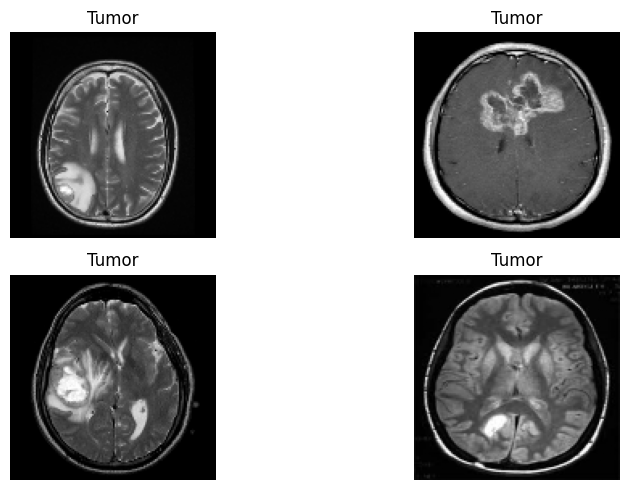

In [45]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
yes = 'brain-mri-images-for-brain-tumor-detection/yes'
no = 'brain-mri-images-for-brain-tumor-detection/no'

# Function to load images
def load_images(folder, label, size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, size)  # Resize to 128x128
            images.append(img)
            labels.append(label)
    return images, labels

# Load data
yes_images, yes_labels = load_images(yes, 1)  # 1 = tumor
no_images, no_labels = load_images(no, 0)     # 0 = no tumor

# Combine and convert to arrays
all_images = yes_images + no_images
all_labels = yes_labels + no_labels
X = np.array(all_images)  # Should be (num_images, 128, 128)
print("Shape after np.array:", X.shape)

# Normalize pixel values (0 to 1)
X = X / 255.0
print("Shape after normalization:", X.shape)

# Add channel dimension for CNN
X = np.expand_dims(X, axis=-1)  # Should be (num_images, 128, 128, 1)
print("Shape after expand_dims:", X.shape)

y = np.array(all_labels)  # Shape: (num_images,)

# Print stats
print("Total images:", len(X))
print("Tumor images:", sum(y), "No-tumor images:", len(y) - sum(y))

# Visualize a few examples
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X[i, :, :, 0], cmap='gray')  # Extract first channel
    plt.title("Tumor" if y[i] == 1 else "No Tumor")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [47]:
# building a CNN
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2,2)), # reduce to 64x64

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), # reduce to 32x32

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),  # reduce to 16x16

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 858,689 (3.28 MB)

 Trainable params: 858,689 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

training images:  202
testing images:  51
num GPUs available:  0
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 996ms/step - accuracy: 0.6543 - loss: 0.6343 - val_accuracy: 0.7255 - val_loss: 0.6147
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 789ms/step - accuracy: 0.7797 - loss: 0.4963 - val_accuracy: 0.6863 - val_loss: 0.7672
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 768ms/step - accuracy: 0.7626 - loss: 0.5032 - val_accuracy: 0.7255 - val_loss: 0.5597
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 901ms/step - accuracy: 0.8235 - loss: 0.4468 - val_accuracy: 0.7059 - val_loss: 0.5928
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 714ms/step - accuracy: 0.7704 - loss: 0.4674 - val_accuracy: 0.7059 - val_loss: 0.6827
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 877ms/step - accuracy: 0.8555 - loss: 0.3645 - val_accuracy: 0.7059 - val_loss: 0.5276
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 902ms/step - accuracy: 0.9118 - loss: 0.3040 - val_accuracy: 0.7059 - val_loss: 0.4998
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step -

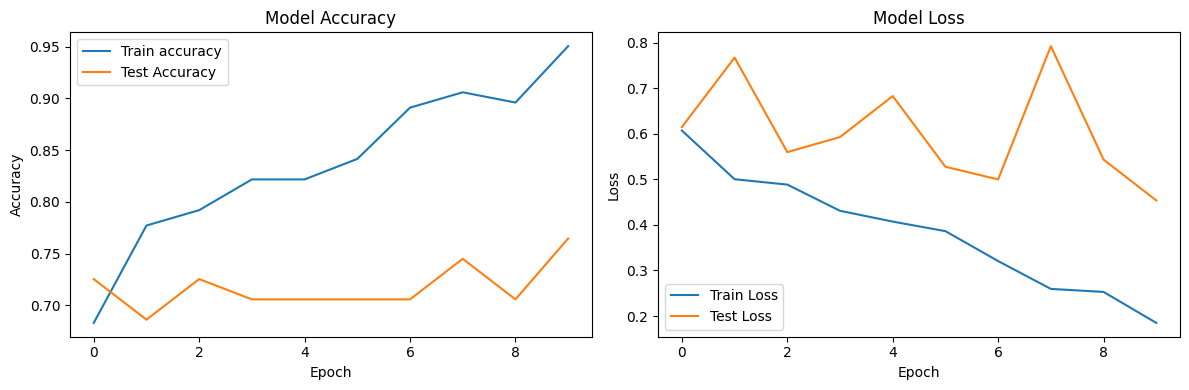

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("training images: ", X_train.shape[0])
print("testing images: ", X_test.shape[0])

# check gpus
print("num GPUs available: ", len(tf.config.list_physical_devices('GPU')))

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test loss:  0.4537
Test Accuracy:  0.7647
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


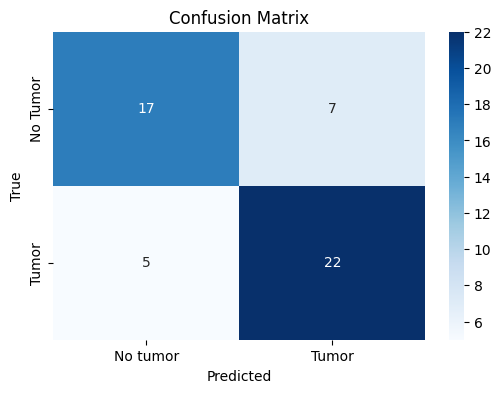


Classification report: 
              precision    recall  f1-score   support

    No tumor       1.00      1.00      1.00        24
       tumor       1.00      1.00      1.00        27

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



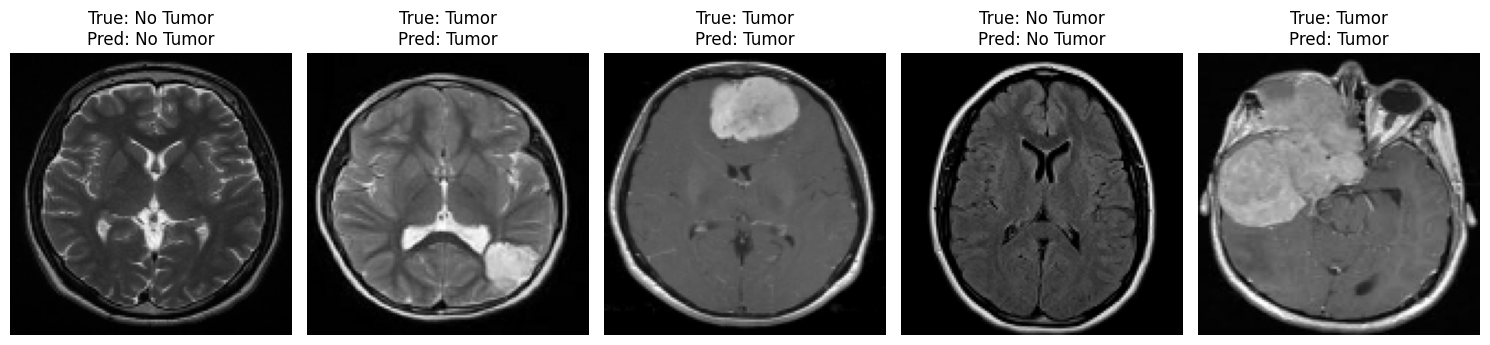

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss: .4f}")
print(f"Test Accuracy: {test_accuracy: .4f}")

y_pred_prob = model.predict(X_test) # prob 0-1
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification report: ")
print(classification_report(y_test, y_test, target_names=["No tumor", "tumor"]))

plt.figure(figsize=(15,5))
for i in range(5):  # Show 5 examples
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    true_label = "Tumor" if y_test[i] == 1 else "No Tumor"
    pred_label = "Tumor" if y_pred[i] == 1 else "No Tumor"
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Test Loss: 0.4537
Test Accuracy: 0.7647
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step


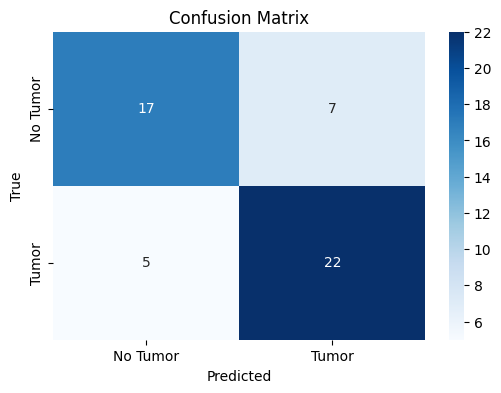


Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.77      0.71      0.74        24
       Tumor       0.76      0.81      0.79        27

    accuracy                           0.76        51
   macro avg       0.77      0.76      0.76        51
weighted avg       0.77      0.76      0.76        51



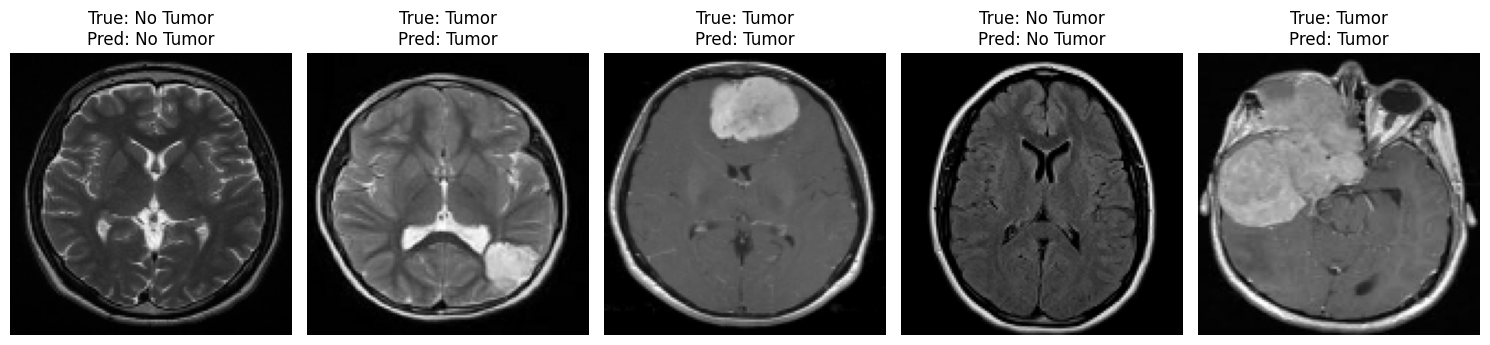

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Binary predictions

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Tumor', 'Tumor']))

# Visualize predictions
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    true_label = "Tumor" if y_test[i] == 1 else "No Tumor"
    pred_label = "Tumor" if y_pred[i] == 1 else "No Tumor"
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()